In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_tsne = pd.read_parquet('data/results/df_tsne.parquet')
df_tsne.head()

,PC1,PC2,Label
0,-18.322725,-16.672157,Syn
1,-54.868546,-18.410553,Syn
2,-45.054012,13.397923,Syn
3,-39.239132,-16.504389,Syn
4,-46.235340,1.965008,Syn


In [63]:
df_tsne_no_benign = pd.read_parquet('data/results/df_tsne_no_benign.parquet')
df_tsne_no_benign.head()

,PC1,PC2,Label
0,-4.541570,-11.997326,Syn
1,-49.244247,-6.464272,Syn
2,-13.750749,8.129172,Syn
3,-34.420837,-13.216851,Syn
4,-25.592207,4.358292,Syn


In [64]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=0.7, min_samples= 15)

df_tsne['dbscan'] = dbscan.fit_predict(df_tsne[['PC1', 'PC2']])

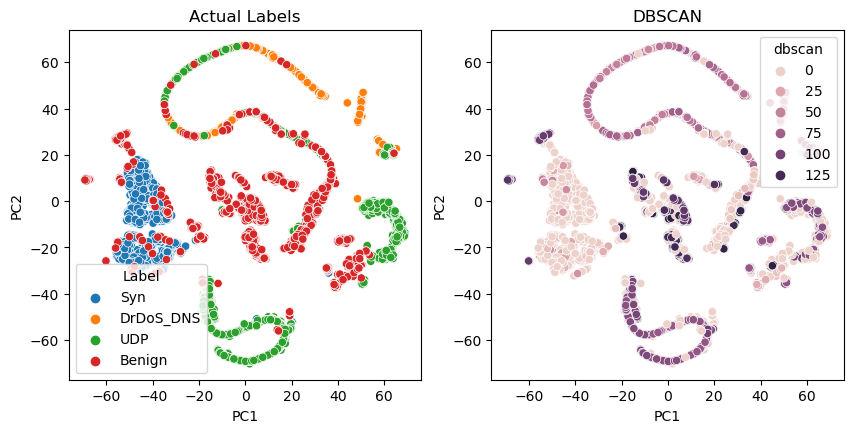

In [65]:
# plot the data and the clusters learned
fig = plt.figure(figsize=(10, 10))
plt.subplot(221)
sns.scatterplot(x='PC1', y='PC2', hue='Label', data=df_tsne)
plt.title('Actual Labels')
plt.subplot(222)
sns.scatterplot(x='PC1', y='PC2', hue='dbscan', data=df_tsne)
plt.title('DBSCAN')
plt.show()

We can see that the DBSCAN algorithm is able to separate the clusters thanks to the t-SNE's dimensionality reduction. However, the different classes are not classified very well.

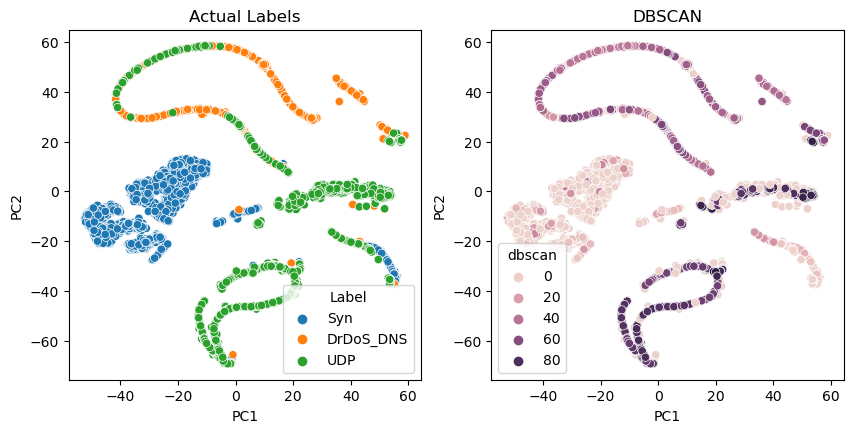

In [66]:
dbscan_no_benign = DBSCAN(eps=0.7, min_samples= 15)

df_tsne_no_benign['dbscan'] = dbscan_no_benign.fit_predict(df_tsne_no_benign[['PC1', 'PC2']])
# plot the data and the clusters learned
fig = plt.figure(figsize=(10, 10))
plt.subplot(221)
sns.scatterplot(x='PC1', y='PC2', hue='Label', data=df_tsne_no_benign)
plt.title('Actual Labels')
plt.subplot(222)
sns.scatterplot(x='PC1', y='PC2', hue='dbscan', data=df_tsne_no_benign)
plt.title('DBSCAN')
plt.show()

When we look at how the DBSCAN performance on clustering the types of attacks without the Benign class, we can see that the algorithm is able to identify the Syn attack very well. Most of the time, the algorithm is not able to distinguish between the DrDoS_DNS and the UDP attacks.